In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train = pd.read_csv('../content/drive/MyDrive/training-em1.csv')
validation = pd.read_csv('../content/drive/MyDrive/validation-em1.csv')
test = pd.read_csv('../content/drive/MyDrive/test-em1.csv')

In [ ]:
print(train.head())
print(validation.head())
print(test.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cranky and blue      3
4  i can have for a treat or if i am feeling festive      1
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yel

In [ ]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
train['description'].value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

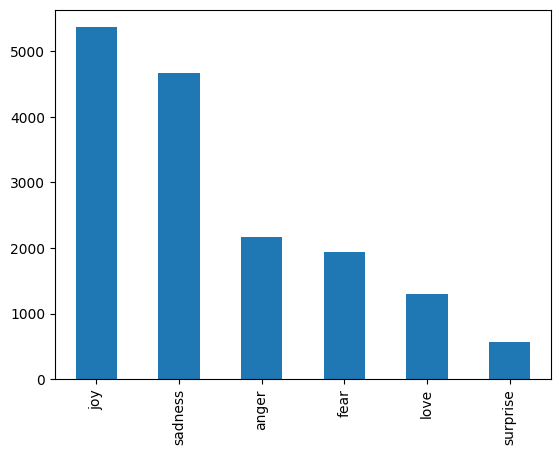

In [ ]:
train['description'].value_counts().plot(kind='bar');

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_cleaning(text):
    punctuation_removed = [char for char in text if char not in string.punctuation]
    p_join = ''.join(punctuation_removed)
    p_join_clean = [word for word in p_join.split() if word.lower() not in stopwords.words('english')]
    return p_join_clean

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# dtrain = train['text'].apply(text_clean)
# dvalid = validation['text'].apply(text_clean)
# train['new_text'] = dtrain
# validation['new_text'] = dvalid


ddtrain = train['text'].apply(text_cleaning)
ddvalid = validation['text'].apply(text_cleaning)
train['list'] = ddtrain
validation['list'] = ddvalid

print(train.head())
print(validation.head())

                                                text  label description  \
0                            i didnt feel humiliated      0     sadness   
1  i can go from feeling so hopeless to so damned...      0     sadness   
2   im grabbing a minute to post i feel greedy wrong      3       anger   
3  i am ever feeling nostalgic about the fireplac...      2        love   
4                               i am feeling grouchy      3       anger   

                                                list  
0                          [didnt, feel, humiliated]  
1  [go, feeling, hopeless, damned, hopeful, aroun...  
2  [im, grabbing, minute, post, feel, greedy, wrong]  
3  [ever, feeling, nostalgic, fireplace, know, st...  
4                                 [feeling, grouchy]  
                                                text  label  \
0  im feeling quite sad and sorry for myself but ...      0   
1  i feel like i am still looking at a blank canv...      0   
2                     i feel l

In [ ]:
X_train, y_train = train['list'].values, train['label'].values
X_val, y_val = validation['list'].values, validation['label'].values
X_test, y_test = test['text'].values, test['label'].values

print(X_train[3])
print(X_val[3])
print(X_test[3])

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property']
['feeling', 'cranky', 'blue']
i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
(16000,) (16000,)
(2000,) (2000,)


In [ ]:
max_features = 2000

tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_pad = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_pad, padding='post', truncating="post", maxlen=100)

vocab_size = len(tokenizer.word_index) + 1

X_val_pad = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_pad, padding='post', truncating="post", maxlen=100)

In [ ]:
print(X_train_pad.shape, X_train_pad[0])
print(X_val_pad.shape, X_val_pad[0])

(16000, 100) [ 50   2 563   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
(2000, 100) [  5   3  62 155 234 110   1 420   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import  Flatten, GlobalMaxPooling1D, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Conv1D, Bidirectional,  MaxPooling1D

In [ ]:
embed_dim = 300

model1 = Sequential([
    Embedding(max_features, embed_dim, input_length=X_train_pad.shape[1]),
    Bidirectional(LSTM(156, dropout=0.2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dense(6, activation = 'softmax')
])
print(model1.summary())

model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          600000    
                                                                 
 bidirectional (Bidirectiona  (None, 312)              570336    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 312)               0         
                                                                 
 dense (Dense)               (None, 128)               40064     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                        

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

history1 = model1.fit(X_train_pad, y_train, validation_data=(X_val_pad,y_val), epochs=10, batch_size=64)

Epoch 1/10
250/250 [==============================] - 262s 1s/step - loss: 1.0479 - accuracy: 0.5911 - val_loss: 0.4408 - val_accuracy: 0.8490
Epoch 2/10
250/250 [==============================] - 232s 927ms/step - loss: 0.2811 - accuracy: 0.9002 - val_loss: 0.2562 - val_accuracy: 0.9125
Epoch 3/10
250/250 [==============================] - 232s 926ms/step - loss: 0.1747 - accuracy: 0.9336 - val_loss: 0.2525 - val_accuracy: 0.9090
Epoch 4/10
250/250 [==============================] - 235s 940ms/step - loss: 0.1268 - accuracy: 0.9503 - val_loss: 0.2405 - val_accuracy: 0.9125
Epoch 5/10
250/250 [==============================] - 232s 926ms/step - loss: 0.1070 - accuracy: 0.9579 - val_loss: 0.2969 - val_accuracy: 0.9055
Epoch 6/10
250/250 [==============================] - 229s 918ms/step - loss: 0.0923 - accuracy: 0.9628 - val_loss: 0.2776 - val_accuracy: 0.9130
Epoch 7/10
250/250 [==============================] - 232s 927ms/step - loss: 0.0859 - accuracy: 0.9651 - val_loss: 0.2542 - va

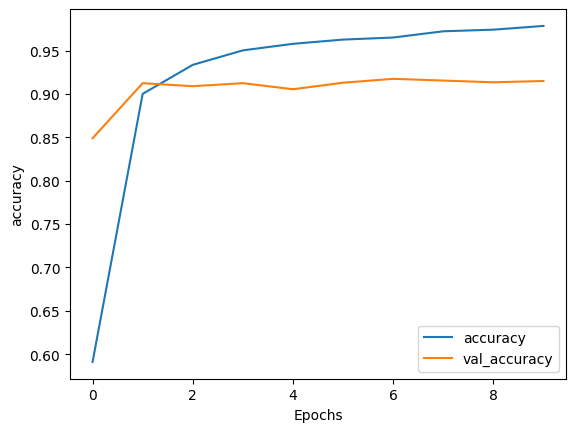

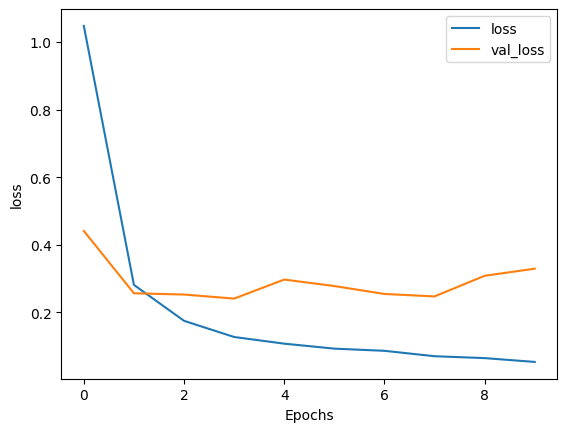

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

In [ ]:
X_test_pad = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_pad, padding='post', truncating="post", maxlen=100)

#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
t_results = model1.evaluate(X_test_pad , y_test, batch_size=32)

print("Test loss:{} and Test accuracy:{}%".format(round(t_results[0], 3), round(t_results[1]*100)))

Evaluate on test data
63/63 [==============================] - 11s 175ms/step - loss: 0.3550 - accuracy: 0.8870
Test loss:0.355 and Test accuracy:89%


In [ ]:
check = 'I am scared of hippos'
check_text = tokenizer.texts_to_sequences([check])[0]
check_text = pad_sequences([check_text],padding='post', truncating="post", maxlen=100)

def Predict(Text, model1):
    predict = model1.predict(Text).flatten()
    predict = [1 if x>=0.5 else 0 for x in predict]
    pos = []
    res = []
    for i in range(0, len(predict), 6):
        pos.append(predict[i:i+6])
    for j in pos:
        for i in j:
            if i==1:
                res.append(j.index(i))
    g =[]
    for i,j in enumerate(labels_dict.items()):
        for s in res:
            if i is s:
    #             g.append(labels_dict[i])
                g.append(j)
    return res, g
        
# Use these: X_test[:5]: X_test_pad[:5],check_text

print(check,'The prediction is {}'.format(Predict(check_text, model1)))
print(X_test[:5],'\n','The prediction is {}'.format(Predict(X_test_pad[:5], model1)))

1/1 [==============================] - 1s 894ms/step
I am scared of hippos The prediction is ([4], [(4, 'fear')])
1/1 [==============================] - 0s 69ms/step
['im feeling rather rotten so im not very ambitious right now'
 'im updating my blog because i feel shitty'
 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her'
 'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived'
 'i was feeling a little vain when i did this one'] 
 The prediction is ([0, 0, 0, 1, 0], [(0, 'sadness'), (0, 'sadness'), (0, 'sadness'), (0, 'sadness'), (1, 'joy')])


In [ ]:
y_pred =   np.argmax(model1.predict(X_test_pad), axis=1)
y_true = np.argmax(y_test, axis=1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

63/63 [==============================] - 10s 164ms/step
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       615
           1       0.90      0.94      0.92       668
           2       0.70      0.77      0.74       145
           3       0.84      0.86      0.85       270
           4       0.86      0.85      0.85       227
           5       0.79      0.69      0.74        75

    accuracy                           0.89      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.89      0.89      0.89      2000

